# Exploratory Data Analysis

## 1. Prepare

### 1.1 Import some necessary libraries


In [1]:
# for basic operations
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [3]:
df = pd.read_csv("data/EDA.csv")

df.head()

,Unnamed: 0,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,...,sales_id,price_per_unit,quantity_product_sales,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days)
0,0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,...,0,106,2,212,1,2,0.00,0.95,Winter,25
1,1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,...,1,118,1,118,8,8,0.00,7.27,Winter,25
2,2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,...,2,96,3,288,0,0,15.79,0.00,Winter,25
3,3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,...,3,106,2,212,0,0,4.50,0.00,Winter,25
4,4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,...,4,113,3,339,0,0,5.04,0.00,Winter,25


Remove redundancy column Uname

In [4]:
df = df.drop(["Unnamed: 0"],axis = 1)

df

,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,gender,...,sales_id,price_per_unit,quantity_product_sales,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days)
0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,Genderfluid,...,0,106,2,212,1,2,0.00,0.95,Winter,25
1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,Genderfluid,...,1,118,1,118,8,8,0.00,7.27,Winter,25
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,Genderfluid,...,2,96,3,288,0,0,15.79,0.00,Winter,25
3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,Genderfluid,...,3,106,2,212,0,0,4.50,0.00,Winter,25
4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,Genderfluid,...,4,113,3,339,0,0,5.04,0.00,Winter,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,321,Shirt,Mandarin Collar,S,orange,108,52,"A orange coloured, S sized, Mandarin Collar Shirt",407,Male,...,4995,109,2,218,1,2,0.00,0.93,Autumn,16
4996,251,Shirt,Polo,S,orange,117,78,"A orange coloured, S sized, Polo Shirt",407,Male,...,4996,95,3,285,0,0,18.80,0.00,Autumn,16
4997,872,Trousers,Chinos,M,violet,100,54,"A violet coloured, M sized, Chinos Trousers",428,Polygender,...,4997,113,1,113,13,13,0.00,13.00,Winter,27
4998,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers",428,Polygender,...,4998,106,2,212,0,0,4.50,0.00,Winter,27


Convert to datetime

### 1.2 Numerical Data

In [5]:
numerical = df.select_dtypes(include=['number'])
numerical.head(3)

,product_id,price,quantity_available_product,customer_id,age,order_id,sales_id,price_per_unit,quantity_product_sales,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,delivery_time (days)
0,218,105,44,64,75,1,0,106,2,212,1,2,0.00,0.95,25
1,481,110,62,64,75,1,1,118,1,118,8,8,0.00,7.27,25
2,2,114,54,64,75,1,2,96,3,288,0,0,15.79,0.00,25


### 1.3 Categorical Data


In [6]:
categorical = df.select_dtypes(exclude=['number'])
categorical.head(3)

,product_type,product_name,size,colour,description,gender,city,state,order_date,delivery_date,season
0,Shirt,Chambray,L,orange,"A orange coloured, L sized, Chambray Shirt",Genderfluid,Sanfordborough,South Australia,2021-08-30,2021-09-24,Winter
1,Jacket,Puffer,S,indigo,"A indigo coloured, S sized, Puffer Jacket",Genderfluid,Sanfordborough,South Australia,2021-08-30,2021-09-24,Winter
2,Shirt,Oxford Cloth,M,red,"A red coloured, M sized, Oxford Cloth Shirt",Genderfluid,Sanfordborough,South Australia,2021-08-30,2021-09-24,Winter


## 2. Descriptive Statistics

In [7]:
numerical.describe()

,product_id,price,quantity_available_product,customer_id,age,order_id,sales_id,price_per_unit,quantity_product_sales,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,delivery_time (days)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,634.053200,105.665400,60.083400,504.563000,48.760400,503.038200,2499.500000,103.501600,1.99240,206.360000,4.982600,10.048200,6.268722,5.176032,13.990200
std,363.255794,9.735564,11.682523,276.504896,17.577519,285.964418,1443.520003,9.195004,0.80751,86.357457,7.160681,16.055698,7.670854,7.588702,7.665106
min,1.000000,90.000000,40.000000,1.000000,20.000000,1.000000,0.000000,90.000000,1.00000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,323.000000,95.000000,50.000000,276.000000,34.000000,258.000000,1249.750000,95.000000,1.00000,112.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,635.000000,108.000000,60.000000,509.000000,48.000000,504.500000,2499.500000,102.000000,2.00000,204.000000,0.000000,0.000000,1.060000,0.000000,14.000000
75%,951.000000,114.000000,70.000000,733.000000,63.000000,749.000000,3749.250000,112.000000,3.00000,285.000000,8.000000,16.000000,12.610000,7.270000,21.000000
max,1259.000000,119.000000,80.000000,1000.000000,80.000000,999.000000,4999.000000,119.000000,3.00000,357.000000,22.000000,66.000000,21.550000,23.160000,27.000000


In [8]:
categorical.describe()

,product_type,product_name,size,colour,description,gender,city,state,order_date,delivery_date,season
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,3,35,5,7,1233,8,604,8,291,304,4
top,Trousers,Denim,M,blue,"A orange coloured, L sized, Flannel Shirt",Female,Jordanside,South Australia,2021-06-21,2021-03-28,Winter
freq,1683,273,1022,762,13,712,37,718,51,49,1573


In [9]:
df.dtypes

product_id                       int64
product_type                    object
product_name                    object
size                            object
colour                          object
price                            int64
quantity_available_product       int64
description                     object
customer_id                      int64
gender                          object
age                              int64
city                            object
state                           object
order_id                         int64
order_date                      object
delivery_date                   object
sales_id                         int64
price_per_unit                   int64
quantity_product_sales           int64
total_price                      int64
profit_per_product (dollar)      int64
total_profit (dollars)           int64
discount_per_product           float64
profit_per_product_official    float64
season                          object
delivery_time (days)     

convert to datetime


after checking data types above, time series transformation will be carried out in columns 'order_date' and 'delivery_date' to convert to datetime type

check the data type of each value in the time series column

In [10]:
df_ts = ['order_date','delivery_date']

for i in df_ts:
    print('type',i,'before transformation is ',type(df[i][0]))

type order_date before transformation is  <class 'str'>
type delivery_date before transformation is  <class 'str'>


In [11]:
for i in df_ts:
    df[i] = pd.to_datetime(df[i],  format='%Y/%m/%d')
    print('type',i,'after transformation is ',type(df[i][0]))

type order_date after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
type delivery_date after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


check data types

In [12]:
df.dtypes

product_id                              int64
product_type                           object
product_name                           object
size                                   object
colour                                 object
price                                   int64
quantity_available_product              int64
description                            object
customer_id                             int64
gender                                 object
age                                     int64
city                                   object
state                                  object
order_id                                int64
order_date                     datetime64[ns]
delivery_date                  datetime64[ns]
sales_id                                int64
price_per_unit                          int64
quantity_product_sales                  int64
total_price                             int64
profit_per_product (dollar)             int64
total_profit (dollars)            

## 3. Number of Sales per Month

### 3.1 Import some necessary libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

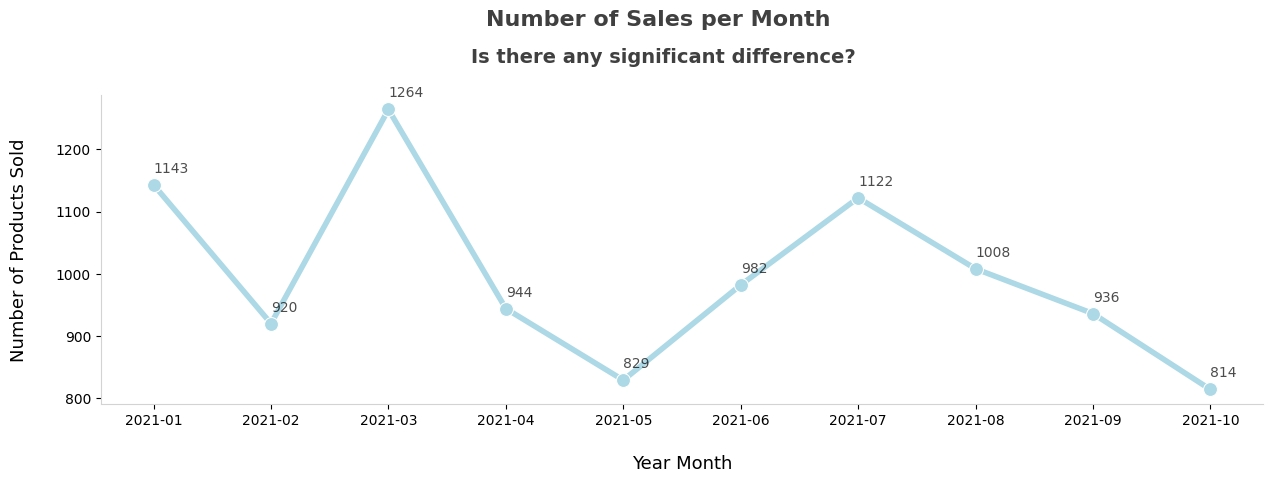

In [14]:
# plot
plt.figure(figsize=(15,4))
df['year_month'] = df['order_date'].dt.strftime('%Y-%m')
data_qt = df.groupby(['year_month'], as_index=False)['quantity_product_sales'].sum()
ax = sns.lineplot(x='year_month', y='quantity_product_sales', marker='o', markersize=10, lw=4, color='lightblue', alpha=1, data=data_qt)

# data points
for x, y in zip(data_qt['year_month'], data_qt['quantity_product_sales']):
    plt.text(x, y=y+20, s='{:.0f}'.format(y), alpha=.7)

# setting
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.xlabel('Year Month', fontsize=13, labelpad=20)
plt.ylabel('Number of Products Sold', fontsize=13, labelpad=20)
plt.title('Number of Sales per Month', fontweight='bold', fontsize=16, y=1.2, x=.48, alpha = .75)
plt.suptitle('Is there any significant difference?', fontweight='bold', fontsize = 14, y=1, x=.5, alpha = .75);

### 3.2 Percentage Change in Sales per Month

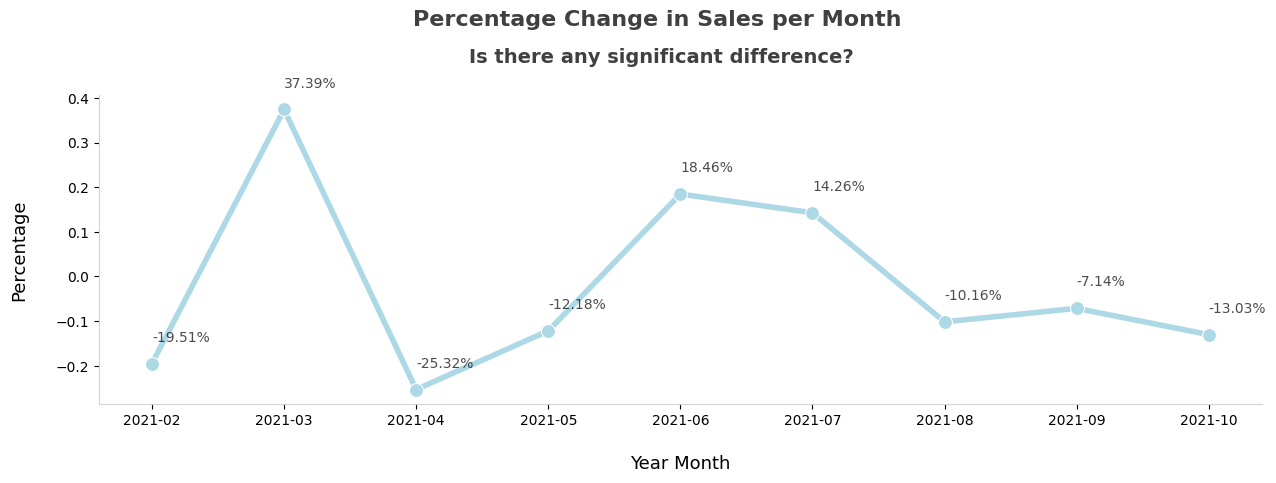

In [15]:
data_pct_qt = data_qt.copy()
data_pct_qt['pct sales'] = data_pct_qt['quantity_product_sales'].pct_change()

# plot
plt.figure(figsize=(15,4))
ax = sns.lineplot(x='year_month', y='pct sales', marker='o', markersize=10, lw=4, color='lightblue', alpha=1, data=data_pct_qt)

# data points
for x, y in zip(data_pct_qt['year_month'], data_pct_qt['pct sales']):
    plt.text(x, y+0.05, s='{:.2f}%'.format(y*100), alpha=.7)

# setting
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.xlabel('Year Month', fontsize=13, labelpad=20)
plt.ylabel('Percentage', fontsize=13, labelpad=20)
plt.title('Percentage Change in Sales per Month', fontweight='bold', fontsize=16, y=1.2, x=.48, alpha = .75)
plt.suptitle('Is there any significant difference?', fontweight='bold', fontsize = 14, y=1, x=.5, alpha = .75);

- Sales experienced a significant increase in March and June which is the beginning of the Autumn and Winter season, then decreased in the following month.
- Overall sales in 2021 did not experience significant movement.

### 3.3. Check for Each Product

In [16]:
df['product_type'].value_counts()

Trousers    1683
Jacket      1676
Shirt       1641
Name: product_type, dtype: int64

check for Trousers

In [17]:
data_tr = df[df['product_type'] == 'Trousers']

In [18]:
data_tr['year_month'] = data_tr['order_date'].dt.strftime('%Y-%m')
data_pct_sales_tr = data_tr.groupby(['year_month'], as_index=False)['quantity_product_sales'].sum()
data_pct_sales_tr['pct sales tr'] = data_pct_sales_tr['quantity_product_sales'].pct_change();

<ipython-input-18-0d708377d511>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr['year_month'] = data_tr['order_date'].dt.strftime('%Y-%m')


check for Jacket

In [19]:
data_jk = df[df['product_type'] == 'Jacket']

In [20]:
data_jk['year_month'] = data_jk['order_date'].dt.strftime('%Y-%m')
data_pct_sales_jk = data_jk.groupby(['year_month'], as_index=False)['quantity_product_sales'].sum()
data_pct_sales_jk['pct sales jk'] = data_pct_sales_jk['quantity_product_sales'].pct_change()

<ipython-input-20-19e0fa4dd959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jk['year_month'] = data_jk['order_date'].dt.strftime('%Y-%m')


check for Shirt

In [21]:
data_sh = df[df['product_type'] == 'Shirt']

In [22]:
data_sh['year_month'] = data_sh['order_date'].dt.strftime('%Y-%m')
data_pct_sales_sh = data_sh.groupby(['year_month'], as_index=False)['quantity_product_sales'].sum()
data_pct_sales_sh['pct sales sh'] = data_pct_sales_sh['quantity_product_sales'].pct_change()

<ipython-input-22-6606ddd4d2b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sh['year_month'] = data_sh['order_date'].dt.strftime('%Y-%m')


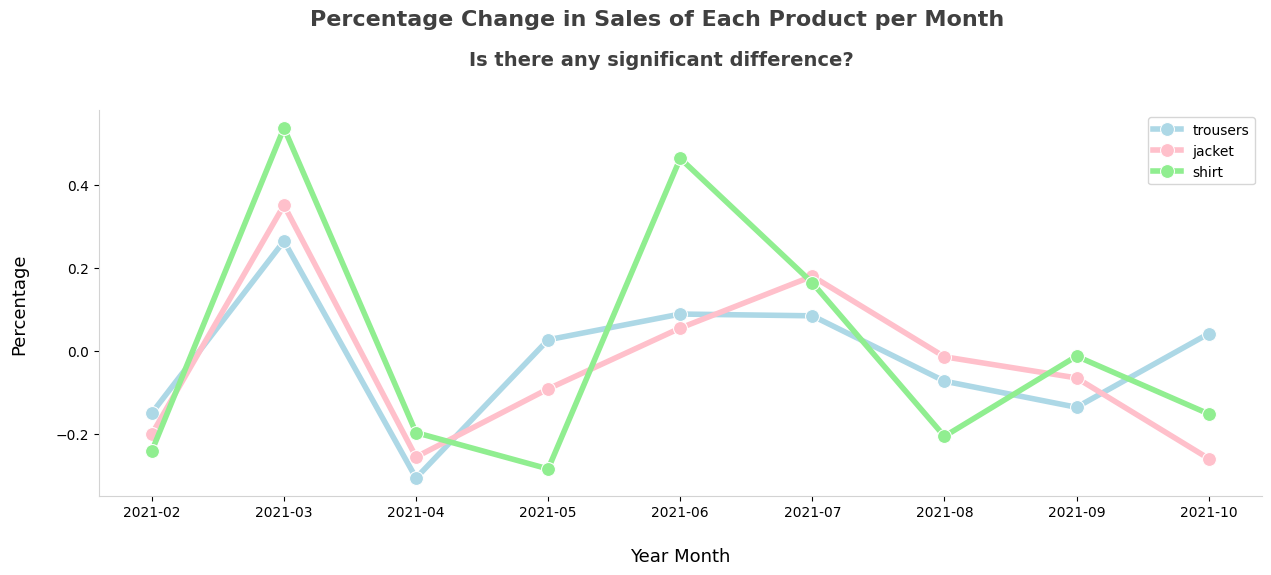

In [23]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

# plot trousers
sns.lineplot(x='year_month', y='pct sales tr', marker='o', markersize=10, lw=4, color='lightblue', alpha=1, data=data_pct_sales_tr, label='trousers')

# data points
# for x, y in zip(data_pct_sales_tr['year_month'], data_pct_sales_tr['pct sales tr']):
#     plt.text(x, y+0.025, s='{:.2f}%'.format(y*100), alpha=.7, color='blue')


# plot jacket
sns.lineplot(x='year_month', y='pct sales jk', marker='o', markersize=10, lw=4, color='pink', alpha=1, data=data_pct_sales_jk, label='jacket')

# data points
# for x, y in zip(data_pct_sales_jk['year_month'], data_pct_sales_jk['pct sales jk']):
#     plt.text(x, y+0.025, s='{:.2f}%'.format(y*100), alpha=.7, color='red')


# plot shirt
sns.lineplot(x='year_month', y='pct sales sh', marker='o', markersize=10, lw=4, color='lightgreen', alpha=1, data=data_pct_sales_sh, label='shirt')

# data points
# for x, y in zip(data_pct_sales_sh['year_month'], data_pct_sales_sh['pct sales sh']):
#     plt.text(x, y+0.025, s='{:.2f}%'.format(y*100), alpha=.7, color='green')


# setting
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.xlabel('Year Month', fontsize=13, labelpad=20)
plt.ylabel('Percentage', fontsize=13, labelpad=20)
plt.title('Percentage Change in Sales of Each Product per Month', fontweight='bold', fontsize=16, y=1.2, x=.48, alpha = .75)
plt.suptitle('Is there any significant difference?', fontweight='bold', fontsize = 14, y=1, x=.5, alpha = .75)
plt.legend()
plt.show();

- Each product experienced a significant increase in sales in March, June, and July which is the beginning of the Autumn and Winter season, then decreased significantly in the following month.
- Sales of all products in 2021 did not experience significant movements except at the beginning of the Autumn and Winter seasons.

### 3.4. Total Profit per Month

In [24]:
df['year_month'] = df['order_date'].dt.strftime('%Y-%m')
data_pf = df.groupby(['year_month'], as_index=False)['total_profit (dollars)'].sum()

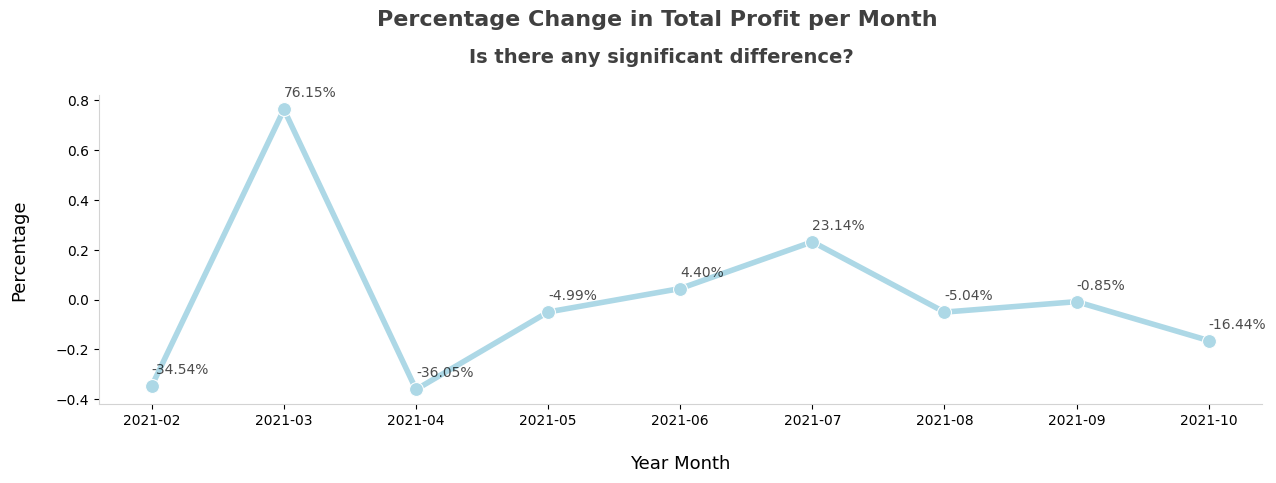

In [25]:
data_pct_pf = data_pf.copy()
data_pct_pf['pct total profit'] = data_pct_pf['total_profit (dollars)'].pct_change()

# plot
plt.figure(figsize=(15,4))
ax = sns.lineplot(x='year_month', y='pct total profit', marker='o', markersize=10, lw=4, color='lightblue', alpha=1, data=data_pct_pf)

# data points
for x, y in zip(data_pct_pf['year_month'], data_pct_pf['pct total profit']):
    plt.text(x, y+0.05, s='{:.2f}%'.format(y*100), alpha=.7)

# setting
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
plt.xlabel('Year Month', fontsize=13, labelpad=20)
plt.ylabel('Percentage', fontsize=13, labelpad=20)
plt.title('Percentage Change in Total Profit per Month', fontweight='bold', fontsize=16, y=1.2, x=.48, alpha = .75)
plt.suptitle('Is there any significant difference?', fontweight='bold', fontsize = 14, y=1, x=.5, alpha = .75);

> The graph of the total profit per month has the same pattern as the number of sales per month (3.2). The biggest profit was obtained in March and July which is the beginning of the Autumn and Winter season, then decreased in the following month.

### 3.5 Number of Sales Per Product

<ipython-input-26-574ce690486c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="product_type", y="quantity_product_sales", data=df, estimator=sum, hue='season', palette="pastel", ci=None)


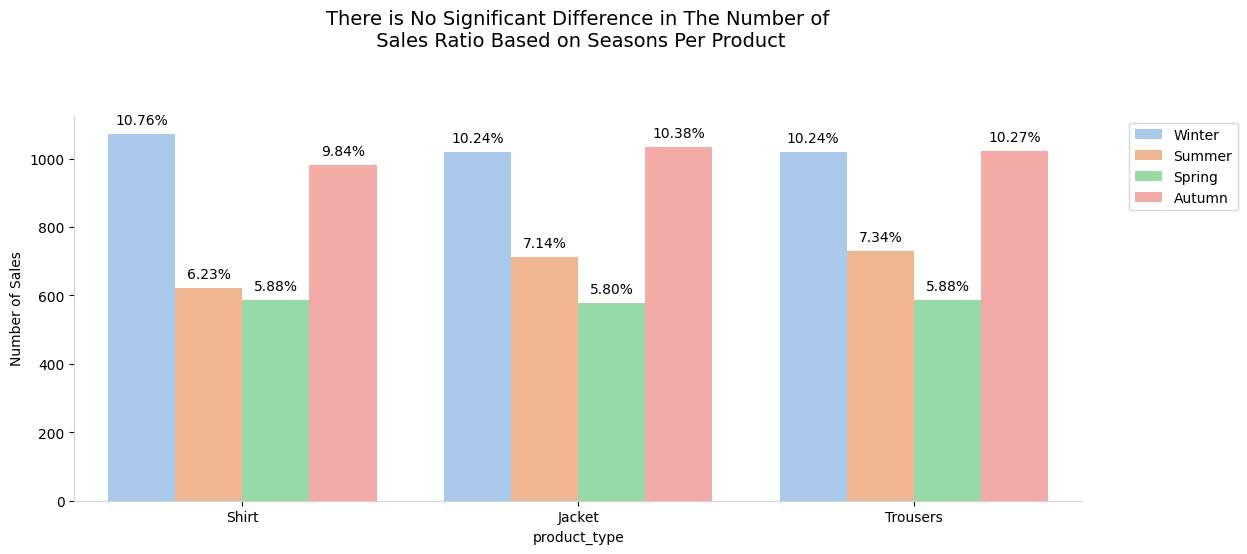

In [26]:
plt.figure(figsize=(13,5))

# plot
ax = sns.barplot(x="product_type", y="quantity_product_sales", data=df, estimator=sum, hue='season', palette="pastel", ci=None)
sns.despine(top=True, right=True, left=False, bottom=False);
ax.spines['left'].set_color('lightgray');
ax.spines['bottom'].set_color('lightgray');

# data points
tampung = []
for x in ax.patches:
    tampung.append(x.get_height())

for x in ax.patches:
    ax.annotate(f'{100 * x.get_height() / sum(tampung):0.2f}%', (x.get_x() + x.get_width() / 2, x.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# settings
ax.set_ylabel('Number of Sales');
ax.set_title('There is No Significant Difference in The Number of\n Sales Ratio Based on Seasons Per Product', fontsize = 14, pad = 50)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left');

- All products have a high number of sales in Winter and Autumn

# 4. Other analysis and visualization

### 4.1 Data visualization

Import some necessary libraries

In [27]:
import statsmodels.api as sm

In [28]:
#Univariant data analysis
def uni_data(data,color,title1,title2):       #defining function
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )
        ##below are two plots: histplot and qqplot
    sns.histplot(                #ploting displot visuvlization
            data,
            color=color,
            kde=True,
            ax=ax1
    )

    ax1.set_title(
        title1,
        weight='bold',
        fontsize=15,
        pad=30
    )
    sm.qqplot(
        data,
        ax=ax2,
        line='s'
    )

    ax2.set_title(
        title2,
        weight='bold',
        fontsize=15,
        pad=30
    )
    return fig

### 4.1 Analysis and visualization of age data

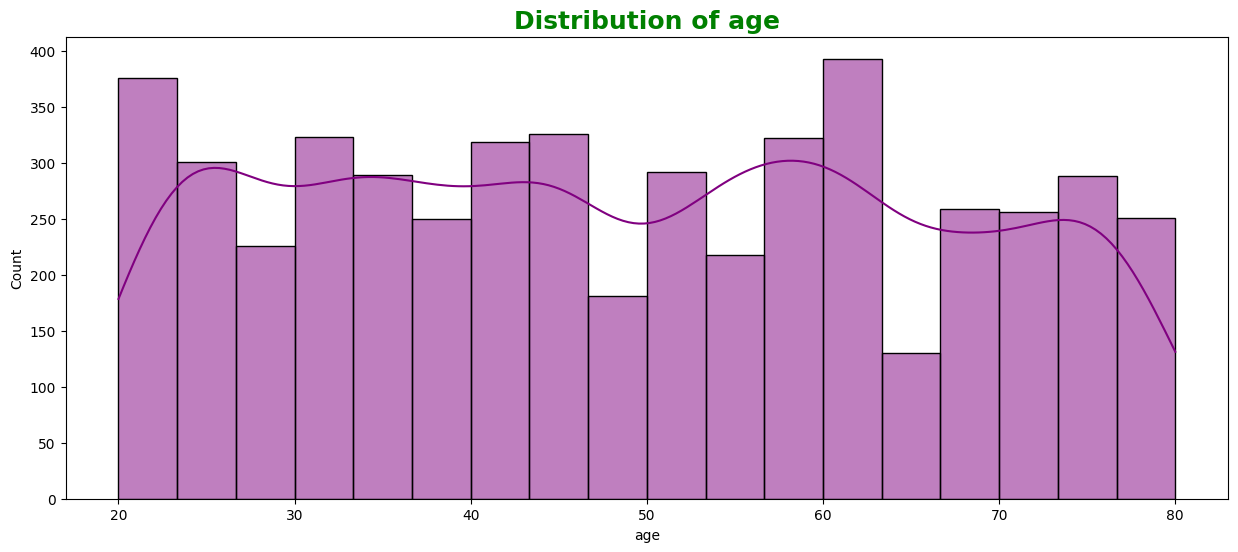

In [29]:
#histogram plot of age
plt.figure(figsize=(15,6))
sns.histplot(df['age'], kde=True,color='purple')
plt.title('Distribution of age',weight='bold',color='green',fontsize=18)
plt.show()

From above visualization we can see that age is uniformly distributed and average age is 50

### 4.2 Price distribution

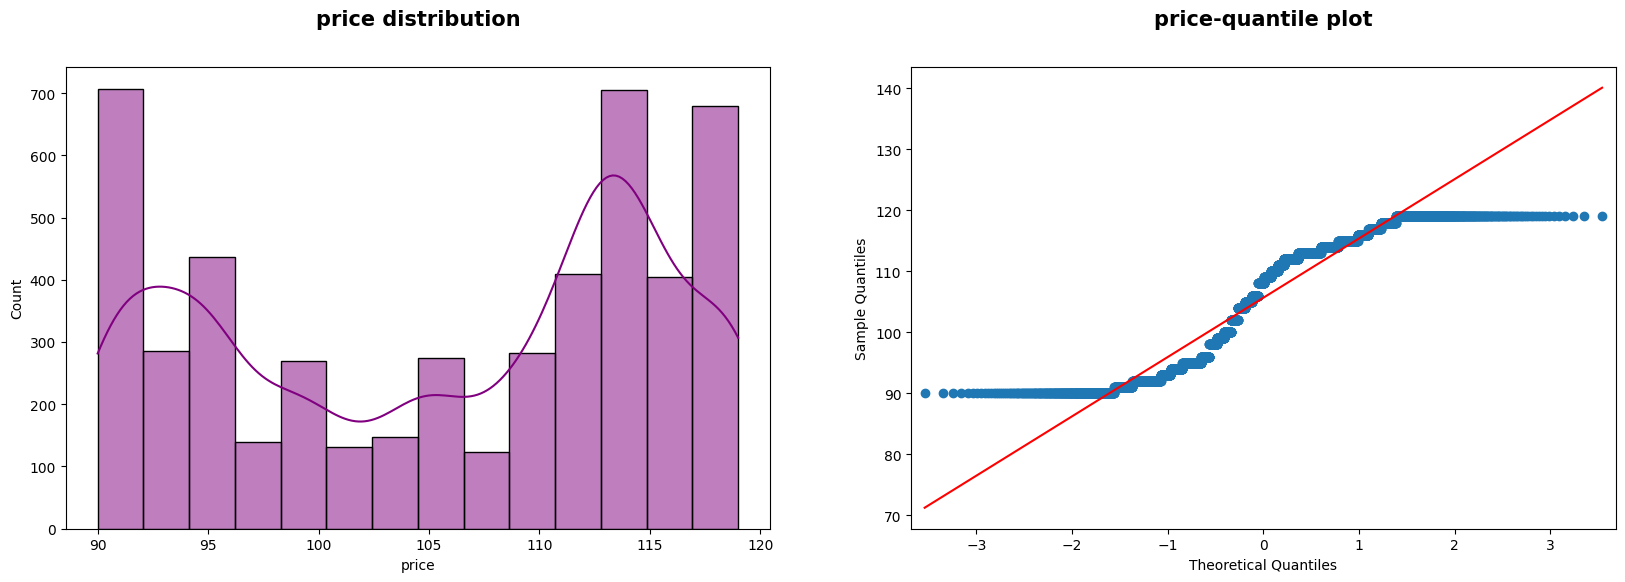

In [30]:
##cal fuction uni_data
uni_data(df['price'],
        color='purple',
        title1='price distribution',
        title2='price-quantile plot'
        );

proportion that lies in between two standard deviation ( 𝜎 ) from mean ( 𝜇 ), and interprete that. In the Price Data, the 𝜇=108.095 and the 𝜎=9.15. 𝜇+-2𝜎 108.1-2(9.2)=89.7 108.1+2(9.2)=126.5 Interpretation: At least 75% of Shopping Cart population in the product price database in Australia has a price range from 89,795−126,395 (Australian Dollars).

### 4.3 Quantity of products Distribution vitualisation


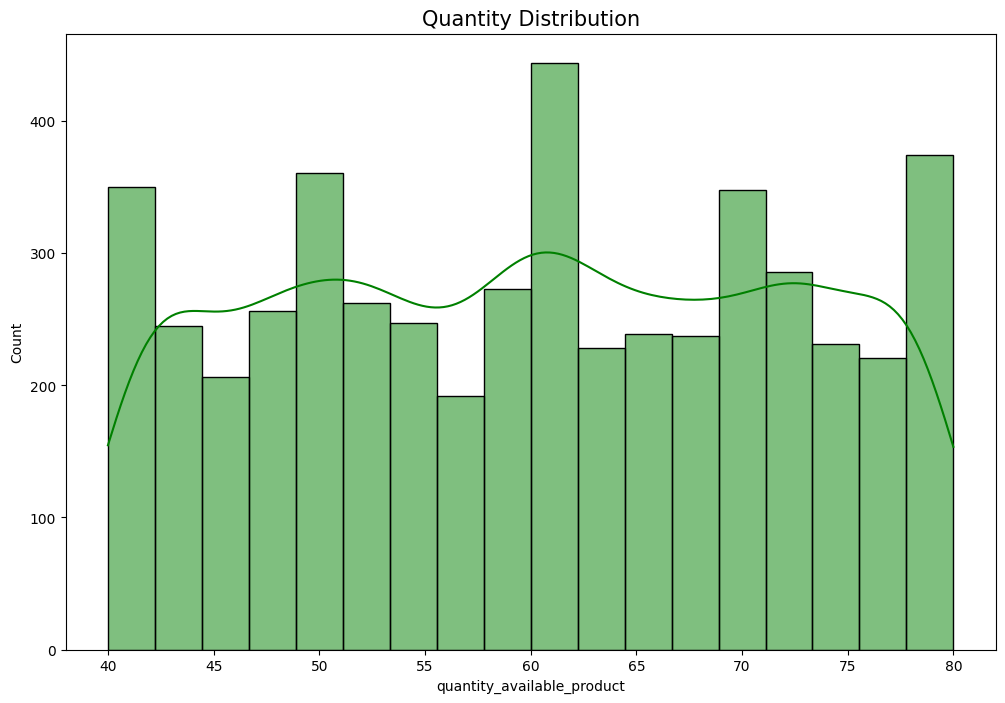

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df['quantity_available_product'],kde=True, color='green')
plt.title('Quantity Distribution',fontsize=15)
plt.show()

The quantity order by Australian shopping cart database ranges between 40-80

### 4.4 Analysis of Price Per Unit

<function matplotlib.pyplot.show(close=None, block=None)>

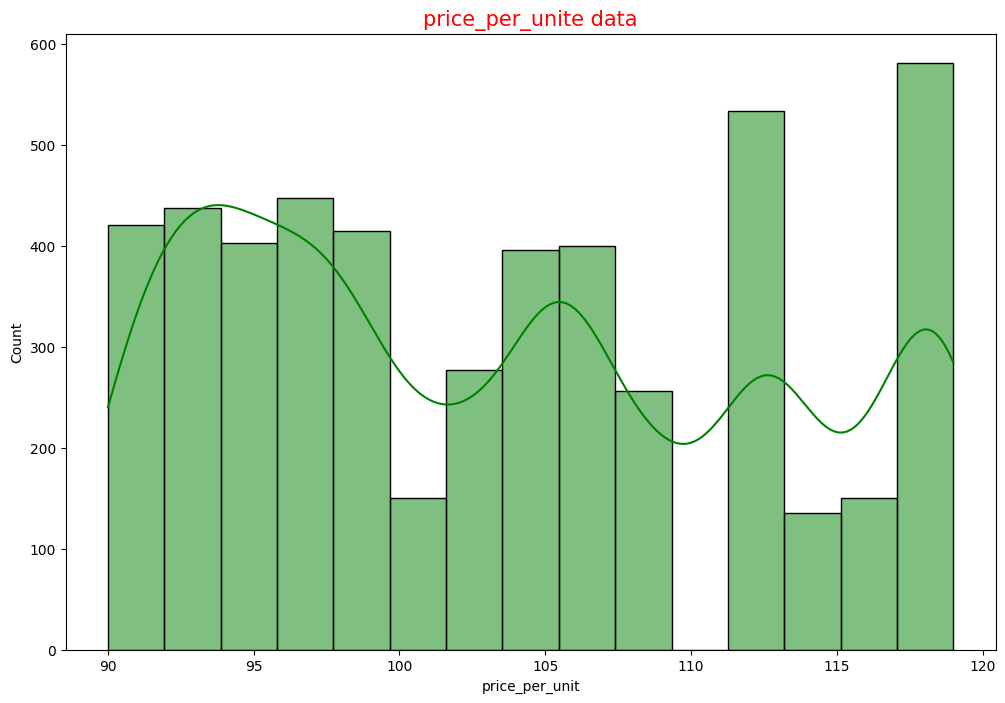

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df['price_per_unit'],kde=True, color='green')
plt.title('price_per_unite data',fontsize = 15,color='red')
plt.show

Interpretation: At least 75% of the population of the Shopping Cart Database, the per unit price range is in between 90 to 120 (Australian Dollars).

### 4.5 how data of sales quantity is distributed

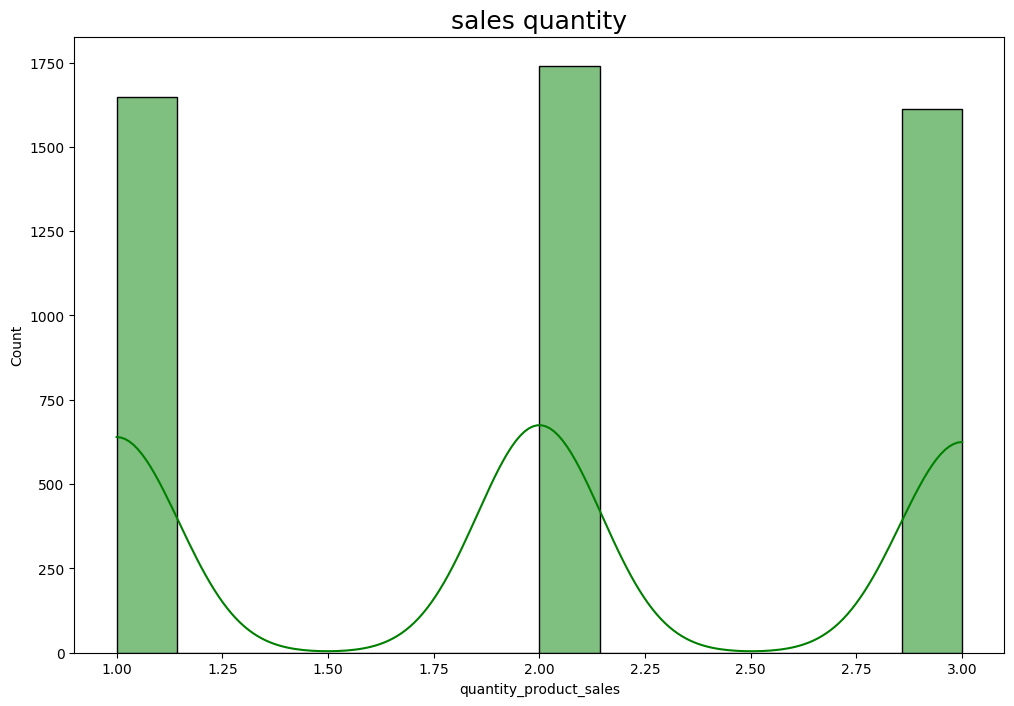

In [33]:
#histogram plot
plt.figure(figsize=(12,8))
sns.histplot(df['quantity_product_sales'], kde=True,color='green')
plt.title('sales quantity',fontsize=18)
plt.show()

75% of sales quantity data ranges between 1-3 products

### 4.6 which product were sold most in last months

In [34]:
df["sales"] = df["price"] * df['quantity_available_product']

df["order_month"] = df["order_date"].dt.month
df.head()

,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,gender,...,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days),year_month,sales,order_month
0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,Genderfluid,...,212,1,2,0.00,0.95,Winter,25,2021-08,4620,8
1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,Genderfluid,...,118,8,8,0.00,7.27,Winter,25,2021-08,6820,8
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,Genderfluid,...,288,0,0,15.79,0.00,Winter,25,2021-08,6156,8
3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,Genderfluid,...,212,0,0,4.50,0.00,Winter,25,2021-08,5772,8
4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,Genderfluid,...,339,0,0,5.04,0.00,Winter,25,2021-08,6307,8


In [35]:
(df.groupby(['product_type','product_name','order_month'])['sales']  #grouping

          .sum()    #sum
           .astype(int)
          .sort_values(ascending=False) #sortying from high to low
          .to_frame() # convert to data fram
           )

sales
product_type product_name      order_month        
Jacket       Leather           3            221706
Shirt        Polo              6            174213
             Casual Slim Fit   3            162381
                               7            159330
Trousers     Joggers           2            158108
...                                            ...
Jacket       Windbreaker       5             33681
Trousers     Tracksuit Bottoms 4             33397
Shirt        Cuban Collar      2             32364
Trousers     Drawstring        9             25688
             Relaxed Leg       10            18050

[360 rows x 1 columns]

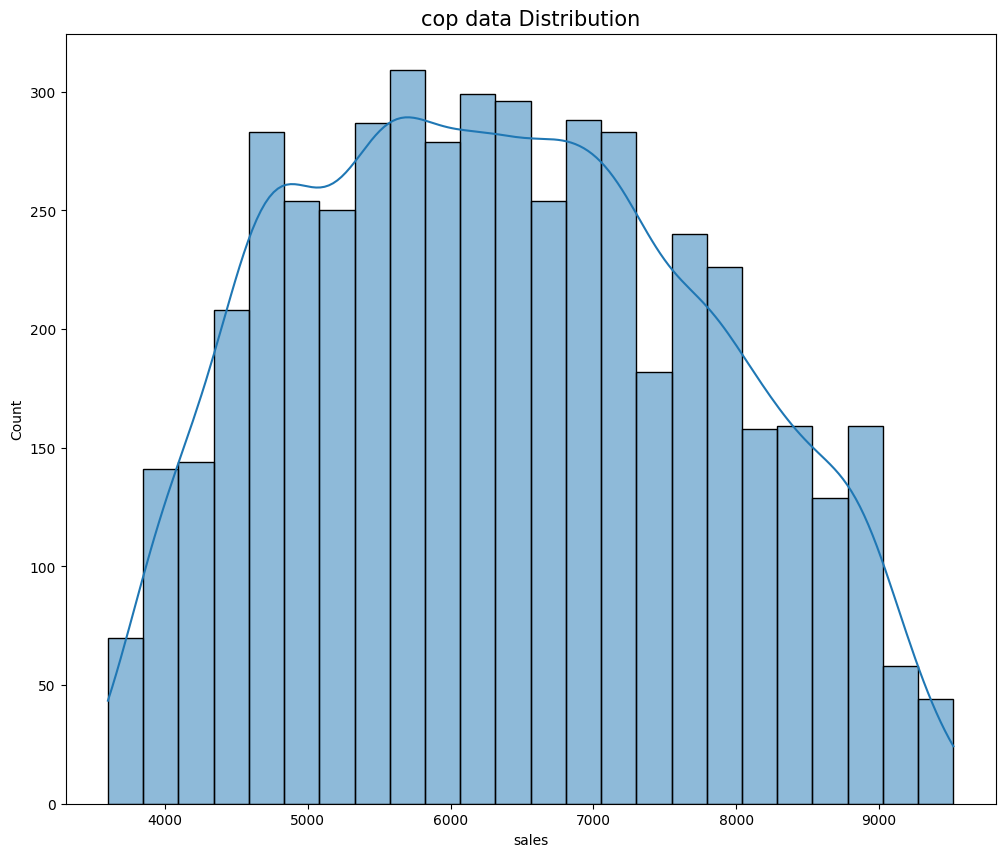

In [36]:
figure=plt.figure(figsize=(12,10))
sns.histplot(df['sales'], kde= True)
title1=plt.title('cop data Distribution',fontsize=15)
plt.show()

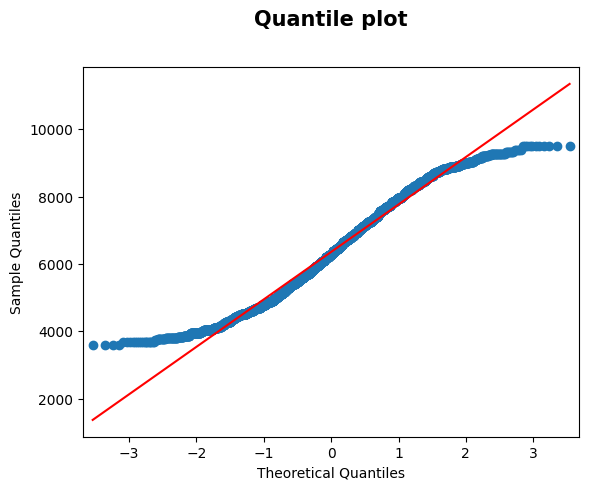

In [37]:
test = df['sales']
sm.qqplot(test ,  line="s")
plt.title(
        'Quantile plot',
        weight='bold',
        fontsize=15,
        pad=30
    )
plt.show()

In [38]:
df['sales'].mean()  # mean of sales data

6357.8172

In [39]:
df['sales'].std() #standard deviation of sales data

1410.9565560515223

Interpretation: At least 75% of the Shopping Cart Database Sales customer population in Australia has sales ranging from 4000 t0 10000 (Australian Dollars).

### 4.7 how sales and revenue changed over the past few quarters


<ipython-input-40-157f11e16404>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_order_month=df.groupby(['order_month']).sum().astype(int) #grouping moth data


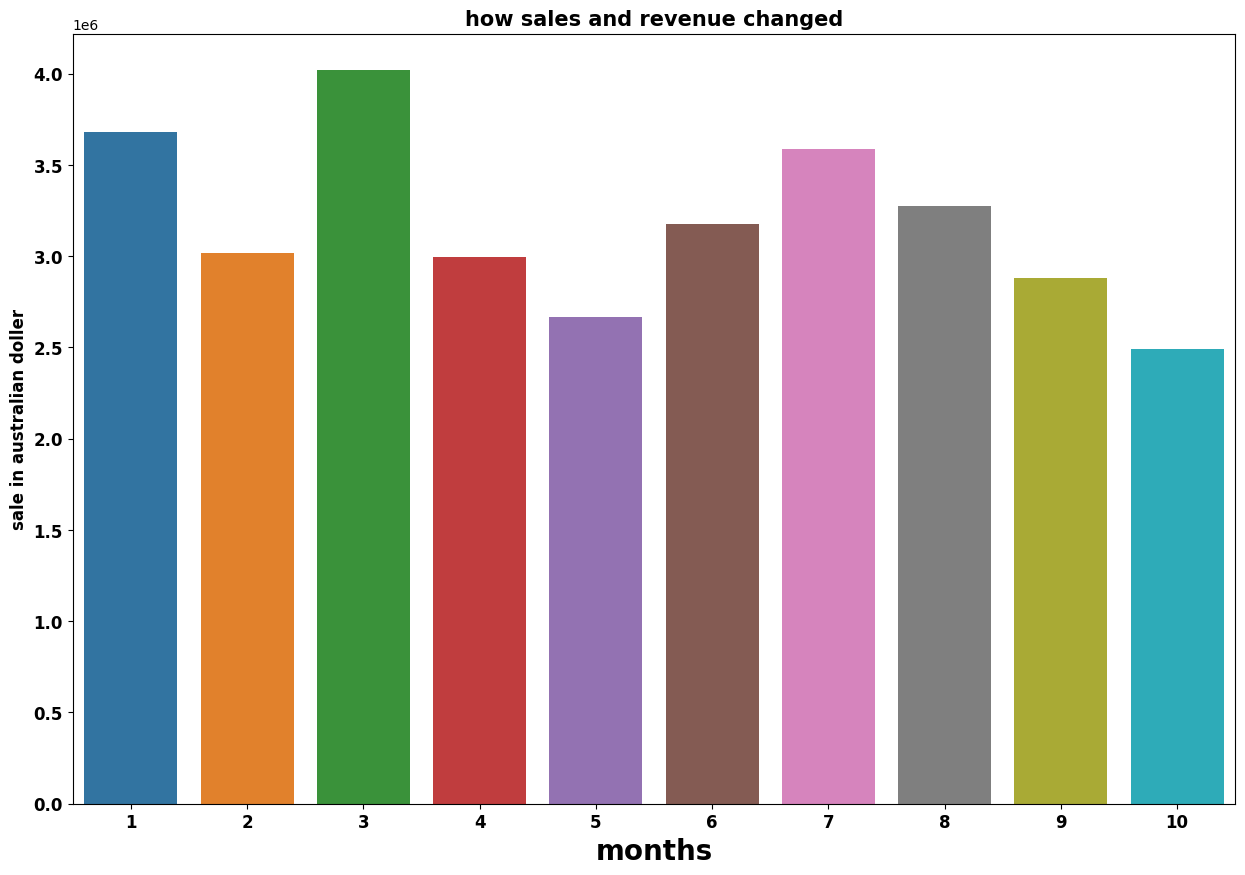

In [40]:
sum_order_month=df.groupby(['order_month']).sum().astype(int) #grouping moth data
# plot bar graph
plt.figure(figsize=(15,10))
sns.barplot(
    x=sum_order_month.index,
    y=sum_order_month['sales'],
    data=sum_order_month,
)

plt.title('how sales and revenue changed',weight='bold',fontsize=15,color='black')
plt.xlabel('months',weight='bold',fontsize=20,color='black')
plt.ylabel('sale in australian doller',weight='bold',fontsize=12,color='black')
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.show()

### 4.8 gender biographics



<ipython-input-41-bb620cb9c7b7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_gender=df.groupby(['gender']).sum()      #grouping gender colomn and sum then


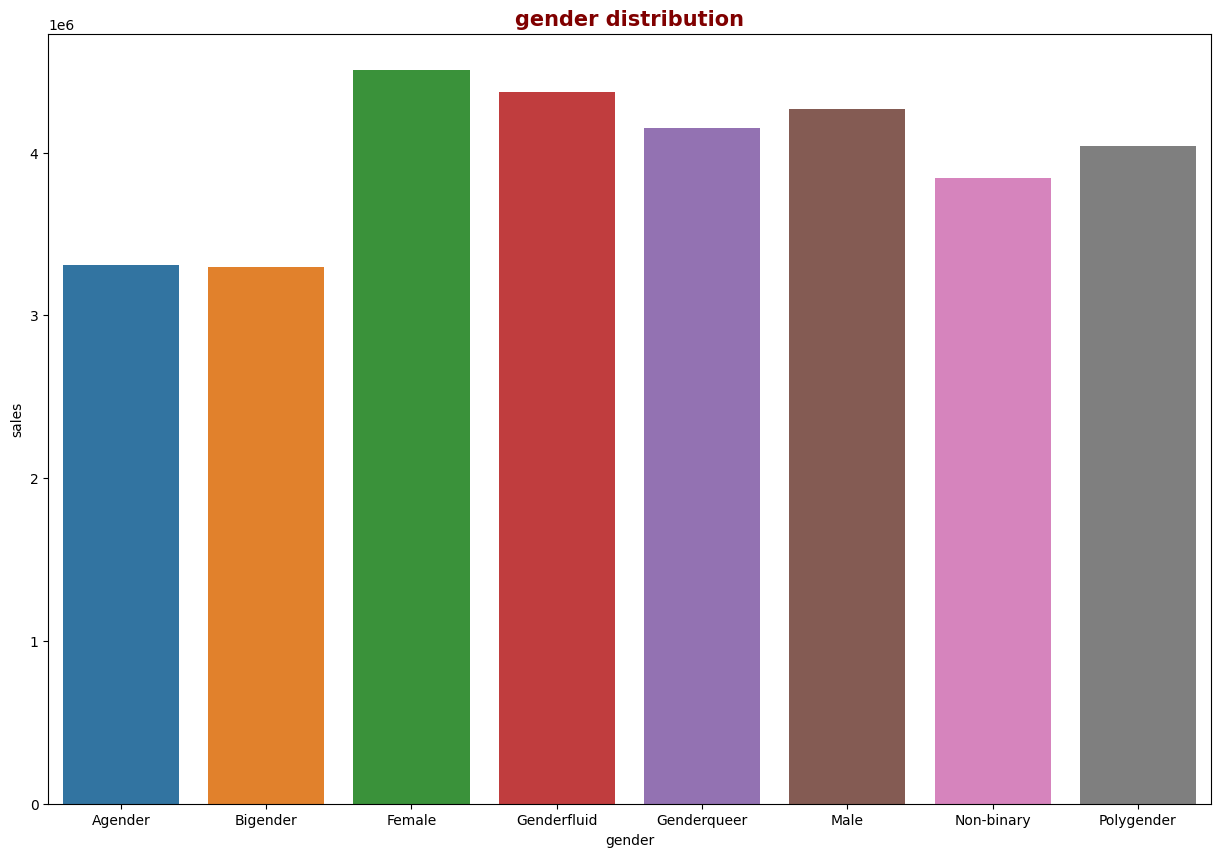

In [41]:
sum_gender=df.groupby(['gender']).sum()      #grouping gender colomn and sum then
plt.figure(figsize=(15,10))
sns.barplot(data=sum_gender,
            x=sum_gender.index,
            y=sum_gender['sales']
            )
plt.title('gender distribution',fontsize=15,weight='bold',color='maroon')
plt.show()

Female gender has been cotributed most in sales.

<ipython-input-42-b5e1f3110e55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_product=df.groupby(['product_name']).sum()      #grouping gender colomn and sum then


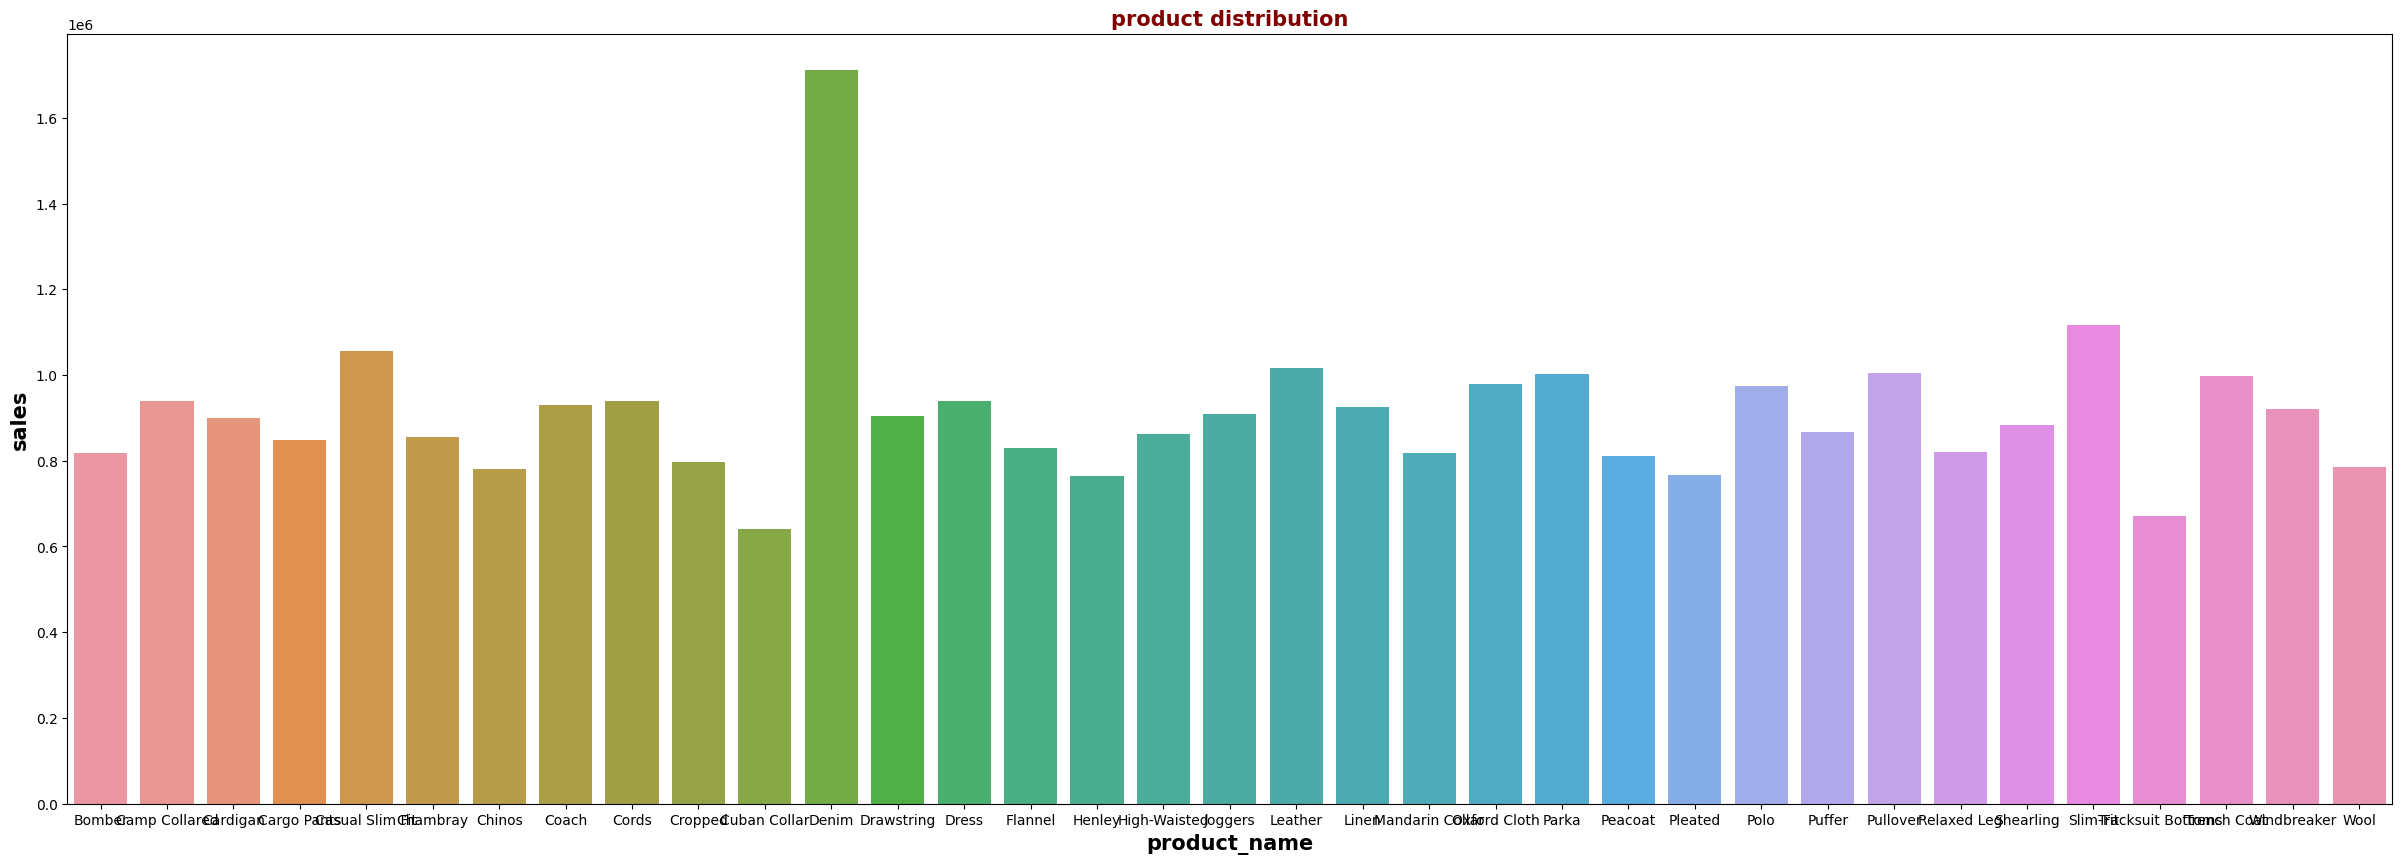

In [42]:
sum_product=df.groupby(['product_name']).sum()      #grouping gender colomn and sum then
plt.figure(figsize=(30,10))
sns.barplot(data=sum_product,
            y=sum_product['sales'],
            x=sum_product.index

            )
plt.title('product distribution',fontsize=15,weight='bold',color='maroon')
plt.ylabel('sales',fontsize=15,weight='bold',color='black')
plt.xlabel('product_name',fontsize=15,weight='bold',color='black')
plt.show()

<Axes: title={'center': 'product_name'}>

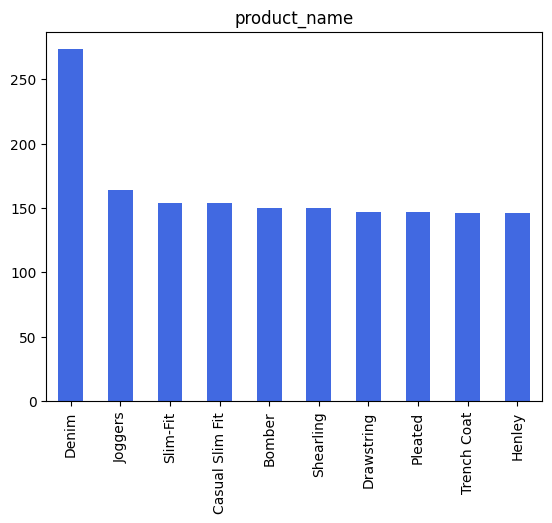

In [43]:
df['product_name'].value_counts()[:10].plot(kind='bar', title='product_name', color='royalblue')


Denim is most sold product wheras woolen products are most less sold.

### 4.9 count of gender

In [44]:
df['gender'].value_counts()

Female         712
Genderfluid    687
Male           672
Genderqueer    647
Polygender     636
Non-binary     598
Agender        526
Bigender       522
Name: gender, dtype: int64

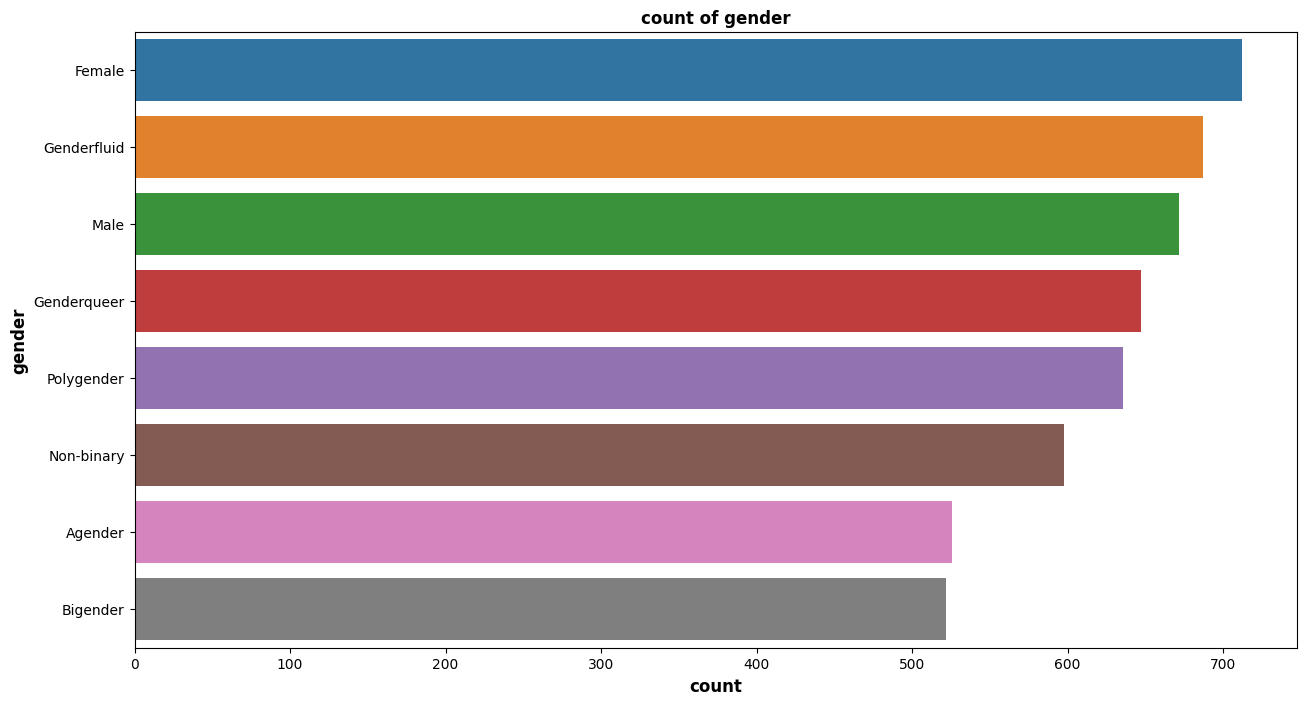

In [45]:
plt.figure(figsize=(15,8))

sns.barplot(
    x=df['gender'].value_counts().values,
    y=df['gender'].value_counts().index
)
plt.title('count of gender',
          weight='bold',
          fontsize=12
          )

plt.xlabel('count',
          weight='bold',
          fontsize=12
           )
plt.ylabel('gender',
          weight='bold',
          fontsize=12
           )

plt.show()

<ipython-input-46-9a45ebc3d45d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['gender']).sum().plot(kind='pie', y='customer_id',autopct='%1.0f%%',figsize=(15, 8))


<Axes: ylabel='customer_id'>

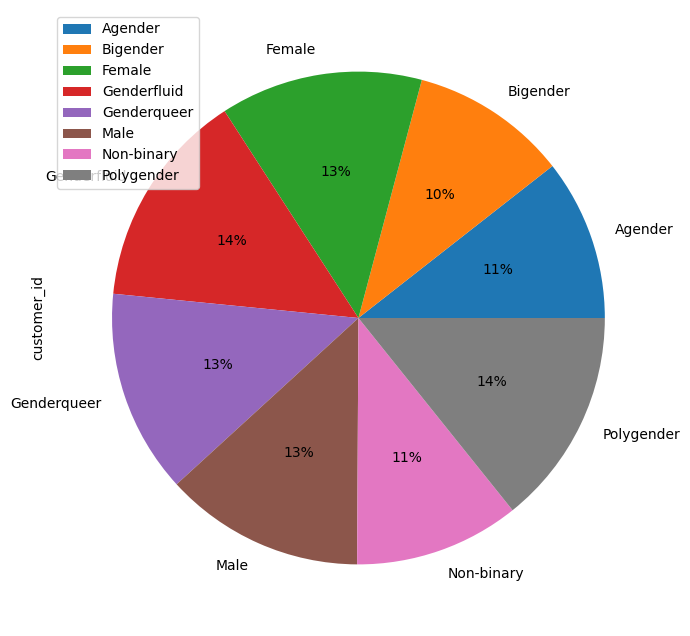

In [46]:
df.groupby(['gender']).sum().plot(kind='pie', y='customer_id',autopct='%1.0f%%',figsize=(15, 8))

### 4.10 sates sale Analysis

In [47]:

df['state'].value_counts()

South Australia                 718
Queensland                      687
New South Wales                 647
Australian Capital Territory    638
Western Australia               604
Victoria                        591
Tasmania                        586
Northern Territory              529
Name: state, dtype: int64

In [48]:
df.groupby(['state'])['sales'].sum().astype(int).sort_values().to_frame()

,sales
state,
Northern Territory,3369161
Tasmania,3710961
Victoria,3732341
Western Australia,3811284
Australian Capital Territory,4055990
New South Wales,4135409
Queensland,4410999
South Australia,4562941


<function matplotlib.pyplot.show(close=None, block=None)>

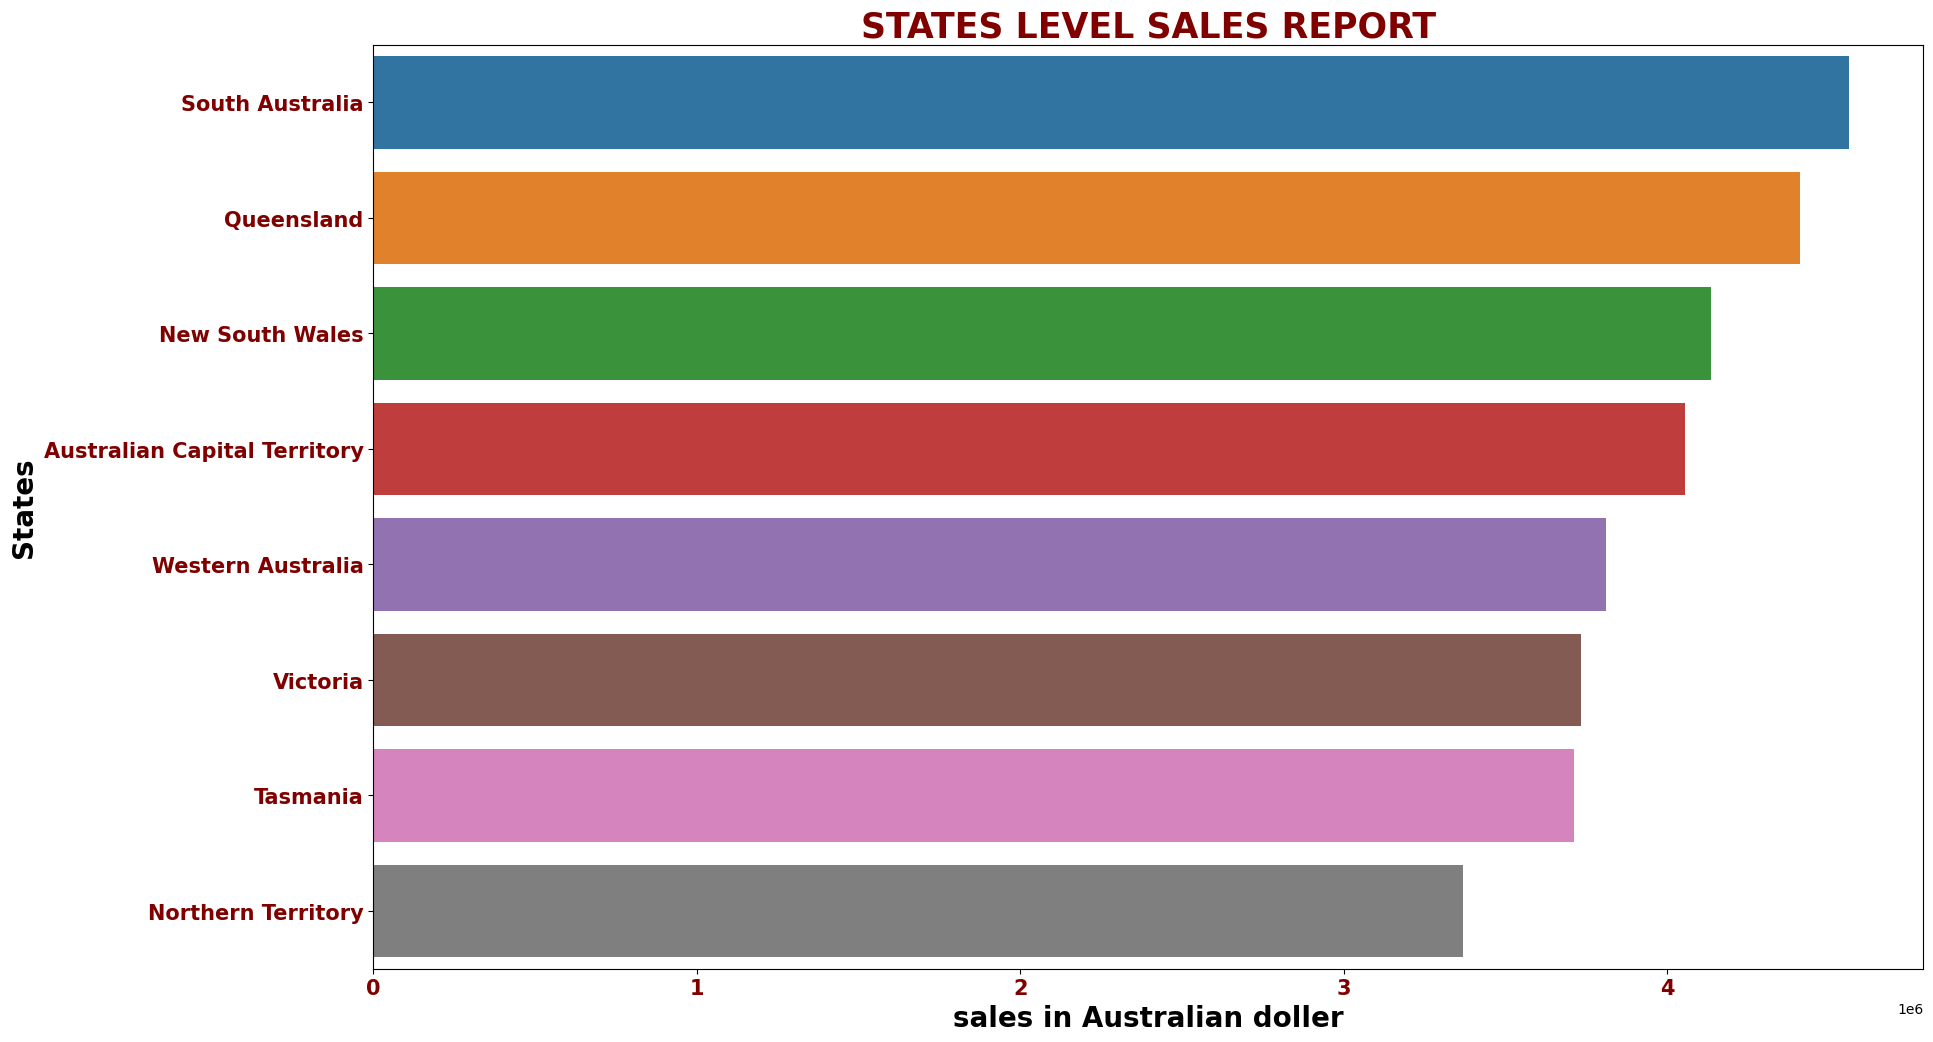

In [49]:
##bar plot of state level sales

state_data=df.groupby(['state'])['sales'].sum().astype(int).sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,12))
sns.barplot(data=state_data,
            x=state_data['sales'],
            y=state_data.index
             )
plt.title('STATES LEVEL SALES REPORT',fontsize=25,color='maroon',weight='bold')
plt.xlabel('sales in Australian doller',weight='bold',fontsize=20)
plt.ylabel('States',weight='bold',fontsize=20)
plt.xticks(fontsize=15,color='maroon',weight='bold')
plt.yticks(fontsize=15,color='maroon',weight='bold')
plt.show

<Axes: title={'center': 'state'}>

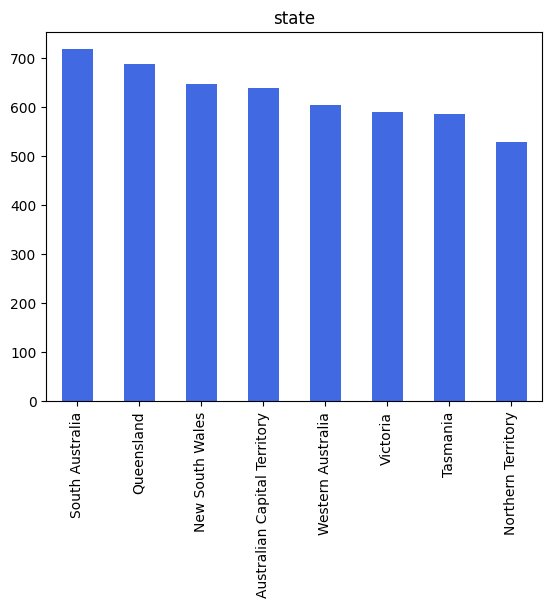

In [50]:
df['state'].value_counts()[:10].plot(kind='bar', title='state', color='royalblue')

from sates sale report: sounth australia had hight sales followed by queensland

### 4.11 top 20 city sales analysis

In [51]:
df['city'].value_counts().head(25)

Jordanside           37
Port Hannahburgh     32
East Max             29
West Finnberg        26
O'keefeton           26
Rubyfort             26
New Ava              25
Lake Jesse           24
West Kai             23
Williammouth         23
South Clairetown     23
Blakemouth           21
Jacobport            21
Tillmanview          21
Jordanborough        21
Port Harrychester    21
Hackettland          21
Port Chelseaport     21
Kohlerberg           21
Claudiaview          20
New Angelina         20
East Aidan           20
West Ashley          20
South Evaport        19
Jettstad             19
Name: city, dtype: int64

In [52]:
top_20_city=df.groupby(['city'])['sales'].sum().astype(int).sort_values(ascending=False).to_frame().head(20)
top_20_city

,sales
city,
Jordanside,234002
Port Hannahburgh,194982
East Max,186468
West Finnberg,171319
O'keefeton,168250
Rubyfort,164408
New Ava,160560
Lake Jesse,152153
Williammouth,150136


<function matplotlib.pyplot.show(close=None, block=None)>

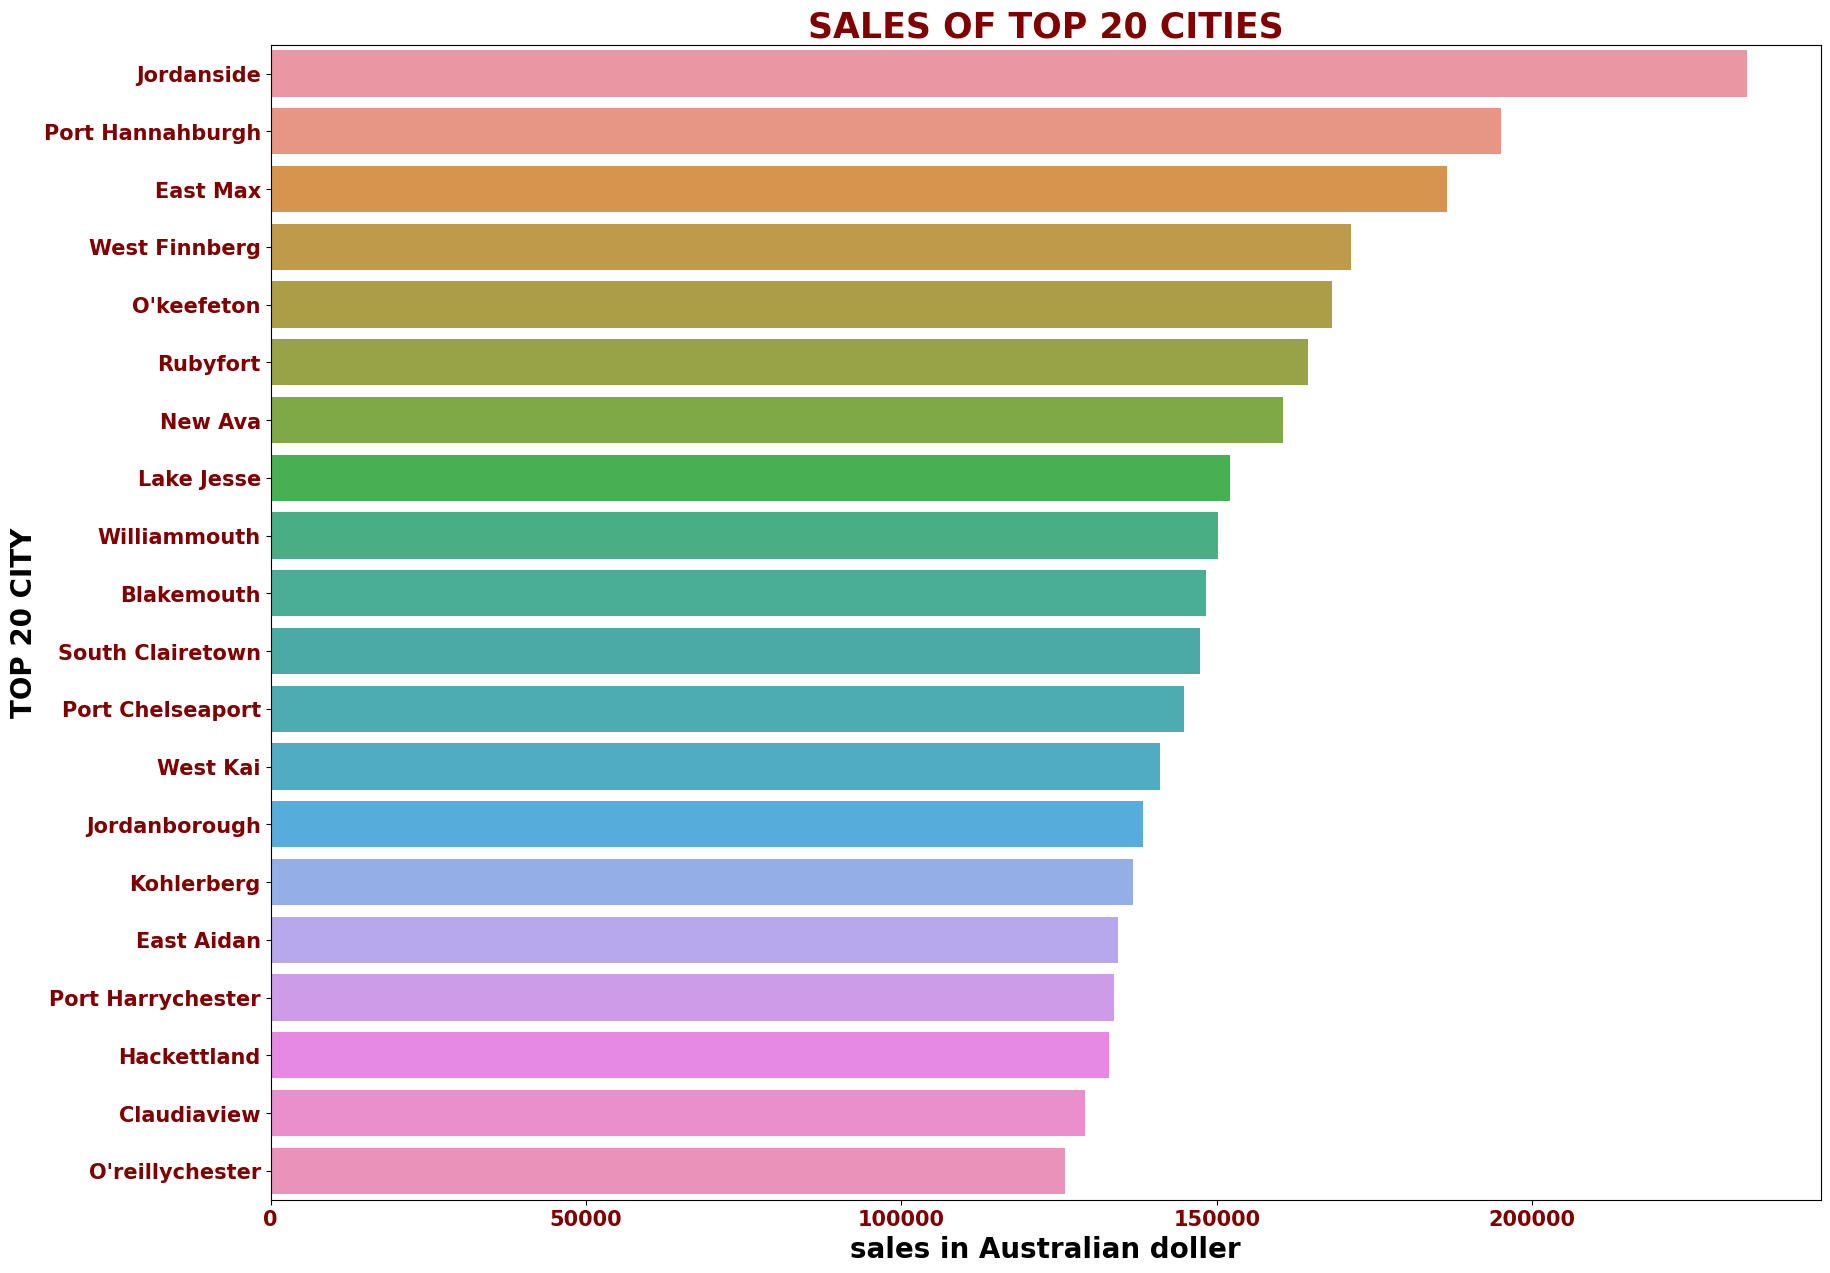

In [53]:
##top 20 cities sales in bar plot
plt.figure(figsize=(20,15))
sns.barplot(
            data=top_20_city,
            x=top_20_city['sales'],
            y=top_20_city.index
)
plt.title('SALES OF TOP 20 CITIES',weight='bold',fontsize=25, color='maroon')
plt.xlabel('sales in Australian doller',weight='bold',fontsize=20)
plt.ylabel('TOP 20 CITY',weight='bold',fontsize=20)
plt.xticks(fontsize=15,color='maroon',weight='bold')
plt.yticks(fontsize=15,color='maroon',weight='bold')
plt.show

<Axes: title={'center': 'city'}>

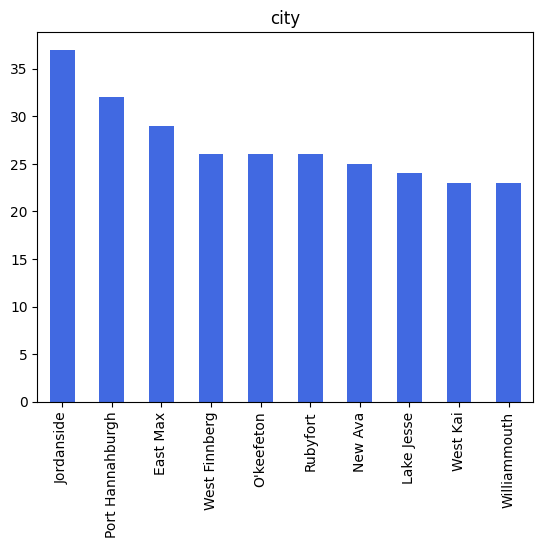

In [54]:

df['city'].value_counts()[:10].plot(kind='bar', title='city', color='royalblue')

### 4.12 Top Spenders

In [55]:
groups = df.groupby("customer_id")["total_price"].sum()
groups2 = groups.nlargest(5)
groups2


customer_id
282    7632
571    6640
664    6341
683    5657
206    5581
Name: total_price, dtype: int64

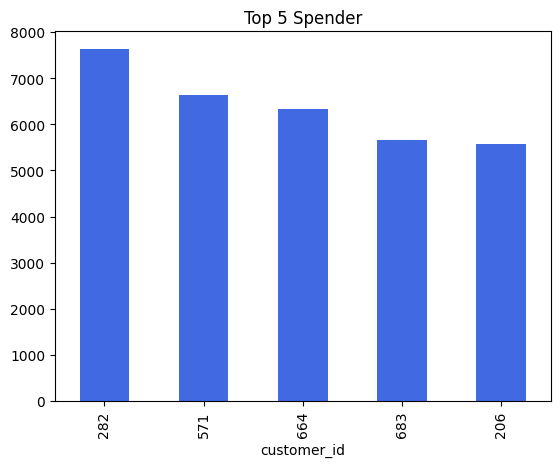

In [56]:
groups2.plot(kind='bar', title='Top 5 Spender', color='royalblue')
plt.show()

# 4. Business Problem

Here includes descriptive, diagnostic, predictive, and prescriptive analytics.

1. Sales experienced a **significant increase** in the early **Autumn** and **Winter** seasons, then **decreased significantly** in the **following month**.
- Is there a correlation between the number of product sales and the season?
- Is there certain product that affects sales in certain seasons?
- How to reduce the decline in product sales (up to 25.32%) in all seasons?
2. Overall sales in 2021 did not experience significant movement.
- What are the product sales predictions in November and December?
- How to increase product sales if it is proven that there is a decline in sales in 2021?
- What factors affect the decline in sales?
3. In this October our sales performance is the worst performance of all time. Our sales experienced a downward trend where monthly sales slowly decreased.

### Target

> How to increase Gross Merchandise Value (GMV) by next month?



### Scope of problem

> Analyzing important aspects of the causes of the decrease in GMV and customer behavior from each segmentation to contribute to impacting the increase in GMV in the following month


# 5. Sales Forecasting

In [57]:
 !pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.9 MB/s eta 0:00:00


In [58]:
# daily sales

df_dl = df.groupby(['order_date','season','product_type'], as_index=False)['quantity_product_sales'].sum()
df_dl['order_date'] = df['order_date'].dt.date

# pivot
df_dl_p = (
    df_dl
    .pivot_table(columns='product_type',index=['order_date','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_dl_p.reset_index(inplace=True)
df_dl_p.columns.name = None

df_dl_p.columns = ['order_date','season','jacket','shirt','trousers','total_sales']
df_dl_p

,order_date,season,jacket,shirt,trousers,total_sales
0,2021-01-01,Summer,35.0,31.0,29.0,95
1,2021-01-03,Autumn,5.0,11.0,8.0,24
2,2021-01-05,Spring,6.0,29.0,22.0,57
3,2021-01-07,Autumn,13.0,11.0,9.0,33
4,2021-01-08,Winter,10.0,27.0,10.0,47
...,...,...,...,...,...,...
156,2021-10-18,Winter,33.0,14.0,15.0,62
157,2021-10-21,Spring,30.0,28.0,18.0,76
158,2021-10-22,Autumn,30.0,28.0,20.0,78
159,2021-10-22,Winter,6.0,NaN,4.0,10


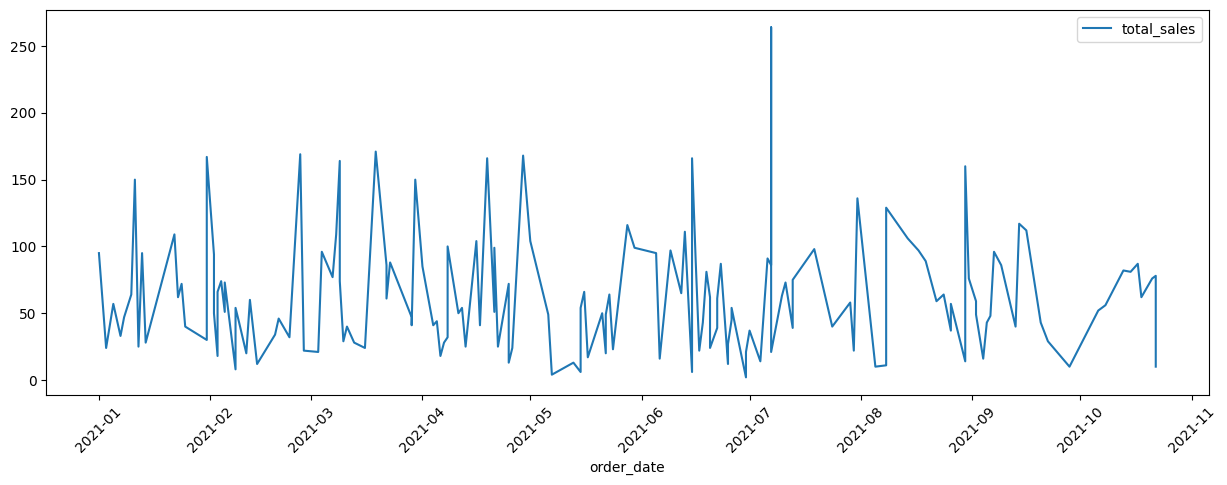

In [59]:
df_dl_p[:-1].plot(x='order_date', y='total_sales', figsize=(15,5))
plt.xticks(rotation=45)
plt.show()

In [60]:
# monthly sales

df['year_month'] = pd.to_datetime(df['year_month']).dt.date
df_tm = df.groupby(['year_month','season','product_type'], as_index=False)['quantity_product_sales'].sum()

# pivot
df_tm_p = (
    df_tm
    .pivot_table(columns='product_type',index=['year_month','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_tm_p.reset_index(inplace=True)
df_tm_p.columns.name = None

df_tm_p.columns = ['year_month','season','jacket','shirt','trousers','total_sales']
df_tm_p

,year_month,season,jacket,shirt,trousers,total_sales
0,2021-01-01,Summer,395,353,395,1143
1,2021-02-01,Summer,316,268,336,920
2,2021-03-01,Autumn,427,412,425,1264
3,2021-04-01,Autumn,318,331,295,944
4,2021-05-01,Autumn,289,237,303,829
5,2021-06-01,Winter,305,347,330,982
6,2021-07-01,Winter,360,404,358,1122
7,2021-08-01,Winter,355,321,332,1008
8,2021-09-01,Spring,332,317,287,936
9,2021-10-01,Spring,246,269,299,814


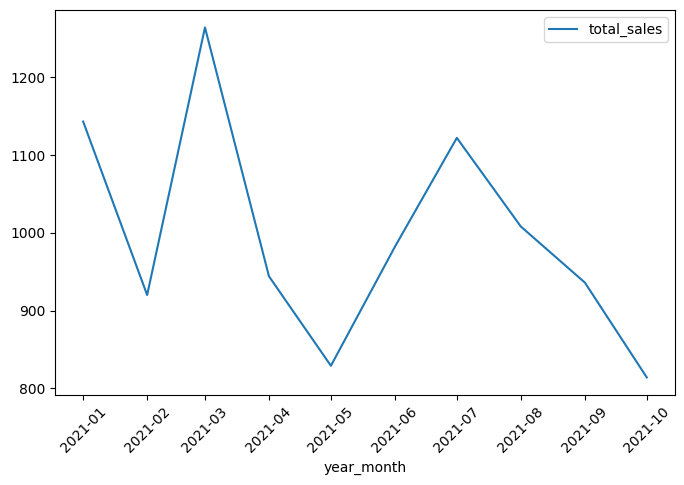

In [61]:
df_tm_p[:-1].plot(x='year_month', y='total_sales', figsize=(8,5))
plt.xticks(rotation=45)
plt.show()

# 6. Gross Merchandise Value (GMV)

In [62]:

df['product'] = df['product_type'] + '-' + df['product_name']
df

,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,gender,...,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days),year_month,sales,order_month,product
0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,Genderfluid,...,1,2,0.00,0.95,Winter,25,2021-08-01,4620,8,Shirt-Chambray
1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,Genderfluid,...,8,8,0.00,7.27,Winter,25,2021-08-01,6820,8,Jacket-Puffer
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,Genderfluid,...,0,0,15.79,0.00,Winter,25,2021-08-01,6156,8,Shirt-Oxford Cloth
3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,Genderfluid,...,0,0,4.50,0.00,Winter,25,2021-08-01,5772,8,Trousers-Wool
4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,Genderfluid,...,0,0,5.04,0.00,Winter,25,2021-08-01,6307,8,Jacket-Parka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,321,Shirt,Mandarin Collar,S,orange,108,52,"A orange coloured, S sized, Mandarin Collar Shirt",407,Male,...,1,2,0.00,0.93,Autumn,16,2021-05-01,5616,5,Shirt-Mandarin Collar
4996,251,Shirt,Polo,S,orange,117,78,"A orange coloured, S sized, Polo Shirt",407,Male,...,0,0,18.80,0.00,Autumn,16,2021-05-01,9126,5,Shirt-Polo
4997,872,Trousers,Chinos,M,violet,100,54,"A violet coloured, M sized, Chinos Trousers",428,Polygender,...,13,13,0.00,13.00,Winter,27,2021-06-01,5400,6,Trousers-Chinos
4998,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers",428,Polygender,...,0,0,4.50,0.00,Winter,27,2021-06-01,4662,6,Trousers-Wool


In [63]:

df['product'].nunique()

36

<Axes: title={'center': 'Most sold Product'}>

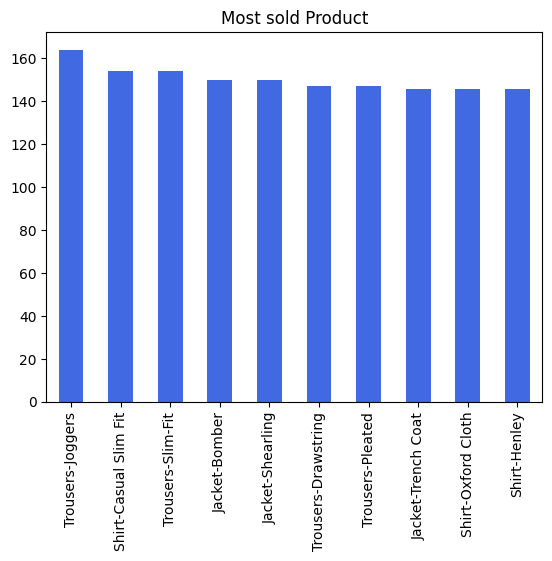

In [64]:

df['product'].value_counts()[:10].plot(kind='bar', title='Most sold Product', color='royalblue')

In [65]:

groups3 = df.groupby("product")["total_price"].sum()
groups4 = groups3.nlargest(10)
groups4

product
Shirt-Casual Slim Fit    36414
Jacket-Trench Coat       35581
Jacket-Shearling         35334
Jacket-Puffer            35164
Shirt-Flannel            33158
Trousers-Cropped         32660
Trousers-Pleated         32340
Trousers-Joggers         31062
Shirt-Chambray           30740
Jacket-Parka             30397
Name: total_price, dtype: int64

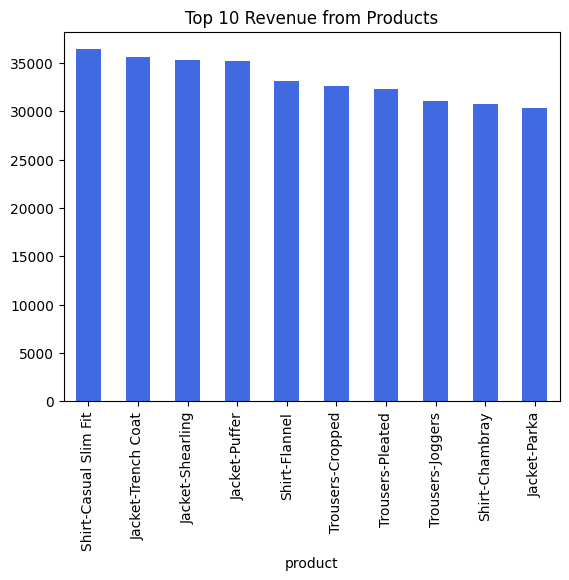

In [66]:
groups4.plot(kind='bar', title='Top 10 Revenue from Products', color='royalblue')
plt.show()

In [67]:
groups5 = df.groupby("customer_id")["total_price"].sum()
group6 = groups5.nlargest(10)
group6

customer_id
282    7632
571    6640
664    6341
683    5657
206    5581
566    5435
348    5119
813    4969
465    4807
727    4428
Name: total_price, dtype: int64

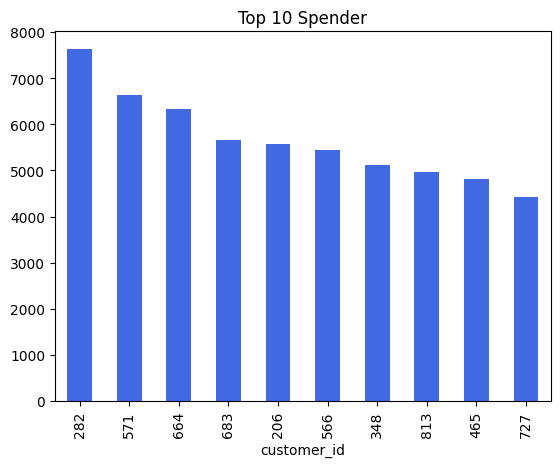

In [68]:
group6.plot(kind='bar', title='Top 10 Spender', color='royalblue')
plt.show()

In [70]:
df

,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,gender,...,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days),year_month,sales,order_month,product
0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,Genderfluid,...,1,2,0.00,0.95,Winter,25,2021-08-01,4620,8,Shirt-Chambray
1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,Genderfluid,...,8,8,0.00,7.27,Winter,25,2021-08-01,6820,8,Jacket-Puffer
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,Genderfluid,...,0,0,15.79,0.00,Winter,25,2021-08-01,6156,8,Shirt-Oxford Cloth
3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,Genderfluid,...,0,0,4.50,0.00,Winter,25,2021-08-01,5772,8,Trousers-Wool
4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,Genderfluid,...,0,0,5.04,0.00,Winter,25,2021-08-01,6307,8,Jacket-Parka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,321,Shirt,Mandarin Collar,S,orange,108,52,"A orange coloured, S sized, Mandarin Collar Shirt",407,Male,...,1,2,0.00,0.93,Autumn,16,2021-05-01,5616,5,Shirt-Mandarin Collar
4996,251,Shirt,Polo,S,orange,117,78,"A orange coloured, S sized, Polo Shirt",407,Male,...,0,0,18.80,0.00,Autumn,16,2021-05-01,9126,5,Shirt-Polo
4997,872,Trousers,Chinos,M,violet,100,54,"A violet coloured, M sized, Chinos Trousers",428,Polygender,...,13,13,0.00,13.00,Winter,27,2021-06-01,5400,6,Trousers-Chinos
4998,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers",428,Polygender,...,0,0,4.50,0.00,Winter,27,2021-06-01,4662,6,Trousers-Wool


In [71]:
# Export as download if in colab
df.drop(['order_month','product'], axis = 1).to_csv('data/df.csv', index=False)